# Linear Regression
In this exercise, we implement linear regression and get to see it work on data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.linear_model
plt.style.available
plt.style.use('seaborn-v0_8-notebook')

In [2]:
def plotData(X, y, theta=None):
    """helper function that we call later to plot the data"""
    plt.scatter(X, y)
    if theta is not None:
        ones = np.ones((len(X), 1))
        X_padded = np.hstack((ones, X))
        hypothesis = X_padded @ np.array(theta)
        plt.plot(X, hypothesis, color='black')
    return plt

# Linear Regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering diﬀerent cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

In [3]:
ex1data1txt = open('./data/ex1data1.txt').read().replace('\n', ';')
ex1data = np.mat(ex1data1txt[:-1])
X1 = np.array(ex1data[:, 0]) # x refers to the population size in 10,000s
y1 = np.array(ex1data[:, 1]).flatten() # y refers to the profit in $10,000s
X1.shape, y1.shape

((97, 1), (97,))

## Plotting Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, we use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that we encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

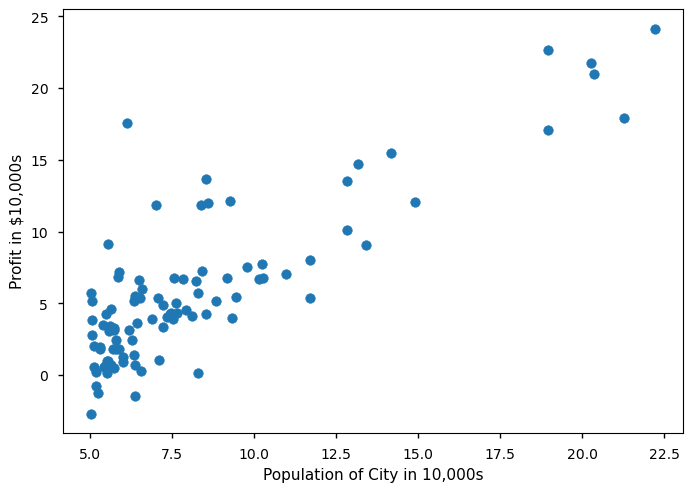

In [4]:
plt.scatter(X1, y1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


## Gradient Descent
### Update Equations
The objective of linear regression is to minimize the cost function:
$$
    J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2
$$
where the hypothesis $ h_\theta(x) $ is defined by the linear model:
$$
    h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x_1 \space + \space ...
$$

Recall that the parameters of your model are the $ \theta_j $ values. These are the values you will adjust in order to minimize the cost function $ J(\theta) $. One common method to perform this optimization is the **batch gradient descent algorithm**. In batch gradient descent, the parameters are updated as follows for each iteration:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

where:

- $ \alpha $ is the learning rate
- $ m $ is the number of training examples
- $ h_{\theta}(x^{(i)}) $ is the predicted value for the $ i $-th training example
- $ y^{(i)} $ is the actual target output for the $ i $-th training example
- $ x_j^{(i)} $ denotes the feature $ j $ of the $ i $-th training example

The iteration performs these updates for all $ \theta_j $ (for $ j = 0, 1, \ldots, n )$ simultaneously in each step until convergence.


### Implementation

We set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the θ₀ intercept term. We also initialize the initial parameters to 0 and set the learning rate `alpha` to 0.01.

In [5]:
theta0 = np.array([0, 0])
iterations = 1500
alpha = 0.01

### Computing the cost J(θ)

As we perform gradient descent to minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, we implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file `computeCost`, which is a function that computes J(θ). As you are doing this, remember that the variables `X` and `y` are not scalar values, but matrices whose rows represent the examples from the training set.

When we run `computeCost` using θ initialized to zeros, we should expect to see a cost of **32.07**.

In [6]:
def computeCost(X, y):
    """Compute the cost function and gradients for linear regression using Mean Squared Error (MSE)"""
    m = len(y)
    ones = np.ones((m, 1))
    X_padded = np.hstack((ones, X))
    
    def J(theta): 
        h = X_padded @ np.array(theta)
        return (1/2/m) * np.sum((h - y)**2)
    
    def JDot(theta):
        h = X_padded @ np.array(theta)
        return (1 / m) * (h - y) @ X_padded
    
    return J, JDot

In [7]:
j, j_dot = computeCost(X1, y1)
j((theta0))

32.072733877455676

### Gradient Descent Implementation

We now implement gradient descent in `gradientDescent`. Note what you we trying to optimize and what is being updated. Keep in mind that the cost $ J(\theta) $ is parameterized by the vector $ \theta $, not `X` and `y`. That is, we minimize the value of $ J(\theta) $ by changing the values of the vector $ \theta $, not by changing `X` or `y`. 

A good way to verify that gradient descent is working correctly is to look at the value of $ J(\theta) $ and check that it is decreasing with each step. The code in `gradientDescent` calls `computeCost` on every iteration and saves the cost. This can be inspected, and assuming we have implemented gradient descent and `computeCost` correctly, your value of $ J(\theta) $ should never increase, and should converge to a steady value by the end of the algorithm.

We use your final parameters to plot the linear fit. We also use final values for $ \theta $ to make predictions on profits in areas of 35,000 and 70,000 people.

In [8]:
def hypothesis(X):
    ones = np.ones((X.shape[0], 1))
    X_padded = np.hstack((ones, X))
    return  lambda theta: X_padded @ np.array(theta)

def gradientDescent(X, y, theta0=None, learning_rate=0.01, iterations=1000):
    """Perform linear regression using batch gradient descent to minimize the cost function."""
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    J, Jdot = computeCost(X, y)
    H = hypothesis(X)
    predictions, costs, grads = [], [], []
    for _ in range(iterations):
        p, c, g = H(theta), J(theta), Jdot(theta)
        theta -= learning_rate * g
        predictions.append(p) 
        costs.append(c) 
        grads.append(g)
    return {'theta': theta, 'costs': costs, 'gradients': grads, 'predictions': predictions}

In [9]:
fit1 = gradientDescent(X1, y1)
theta1 = fit1['theta']
theta1

array([-3.24140214,  1.1272942 ])

In [10]:
predict1 = [1, 3.5] @ theta1
predict2 = [1, 7] @ theta1
predict1, predict2

(0.7041275642242223, 4.649657272722867)

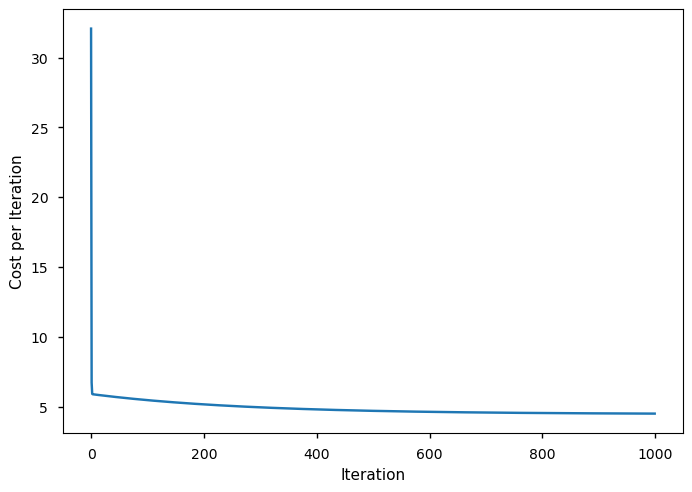

In [11]:
costs = fit1['costs']
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost per Iteration")
plt.show()

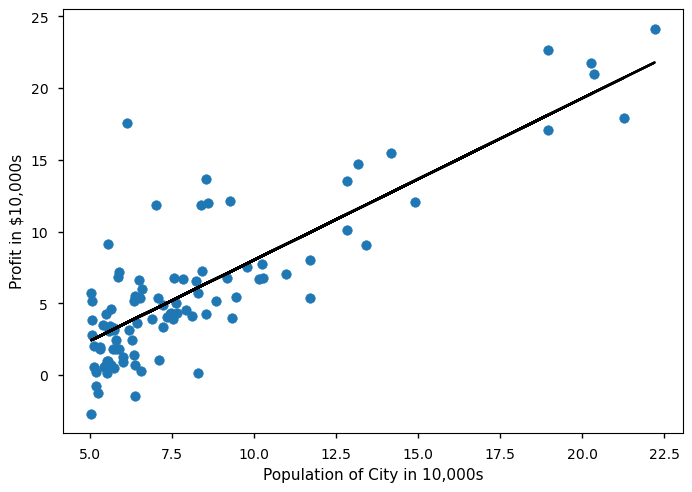

In [12]:
plotData(X1, y1, theta1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

## Visualizing J(θ)
To understand the cost function J(θ) better, we plot the cost over a 2-dimensional grid of $θ_0$ and $θ_1$ values. 

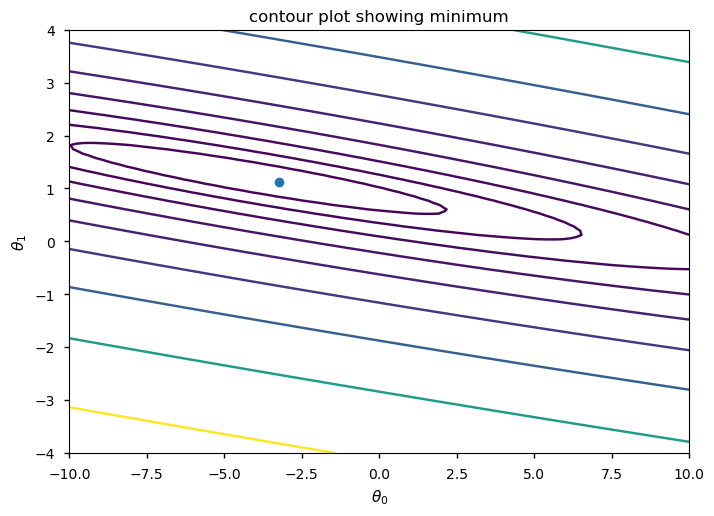

In [13]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-4, 4, 100)
J_vals = np.zeros((len(theta0), len(theta1)))

J, Jdot = computeCost(X1, y1)
for i in range(len(theta0)):
    for j in range(len(theta1)):
        J_vals[j, i] = J(np.array([theta0[i], theta1[j]]))

trough = gradientDescent(X1, y1)['theta']
plt.plot(trough[0], trough[1], marker='o')

plt.contour(theta0, theta1, J_vals, levels=np.logspace(-2, 3, 20))
plt.xlabel('$θ_0$')
plt.ylabel('$θ_1$')
plt.title("contour plot showing minimum")
plt.show()

## Optional Implementation

In [14]:
def linear_reg1(X, y, theta0=None, learning_rate=0.01, iterations=1000):
    """Our home made gradient descent"""
    fit = gradientDescent(X, y, theta0, learning_rate, iterations)
    return fit['theta']

linear_reg1(X1, y1)

array([-3.24140214,  1.1272942 ])

In [15]:
%%timeit
linear_reg1(X1, y1)

8.86 ms ± 165 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
def linear_reg2(X, y, theta0=None):
    """Uses scipy minimze function and a numerical optimization algorithm (BFGS) to minimize the cost function."""
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    J, Jdot = computeCost(X, y)
    result = scipy.optimize.minimize(fun=J, jac=Jdot, x0=theta, method='BFGS')
    return result

linear_reg2(X1, y1).x

array([-3.89578808,  1.19303448])

In [17]:
%%timeit
linear_reg2(X1, y1)

364 μs ± 20.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
def linear_reg3(X, y, theta0=None):
    """Uses scipy minimze function and a numerical optimization algorithm (BFGS) to minimize the cost function.
    This one does not provide the gradient, and hence a little slower"""
    theta = np.zeros(X.shape[1]+1) if theta0 is None else theta0
    J, Jdot = computeCost(X, y)
    result = scipy.optimize.minimize(fun=J, x0=theta, method='BFGS')
    return result

linear_reg3(X1, y1).x

array([-3.89578805,  1.19303447])

In [19]:
%%timeit 
linear_reg3(X1, y1)

734 μs ± 18.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
def linear_reg4(X, y):
    """
    Fits a linear regression model to the input data by directly computing the optimal parameter vector `theta` using 
    the Normal Equation: theta = (X^T * X)^(-1) * X^T * y
    """
    ones = np.ones((len(X), 1))
    X_padded = np.hstack((ones, X))
    term1 = np.linalg.inv(X_padded.T.dot(X_padded))
    term2 = X_padded.T.dot(y)
    return term1 @ term2

linear_reg4(X1, y1)

array([-3.89578088,  1.19303364])

In [21]:
%%timeit
linear_reg4(X1, y1)

7.2 μs ± 38.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
def linear_reg5(X, y):
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)
    return model.intercept_, model.coef_

linear_reg5(X1, y1)

(-3.8957808783118537, array([1.19303364]))

In [23]:
%%timeit
linear_reg5(X1, y1)

122 μs ± 3.25 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# Linear Regression with more than one variable
In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. 
The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house. We start by loading the file. 

In [24]:
ex1datatxt2 = open('./data/ex1data2.txt').read().replace('\n', ';')
ex1data2 = np.mat(ex1datatxt2[:-1])
X2 = np.array(ex1data2[:, 0:-1])
y2 = np.array(ex1data2[:, -1]).flatten()
X2.shape, y2.shape

((47, 2), (47,))

## Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, performing **feature scaling** first can make gradient descent converge much more quickly.

The code in `featureNormalize`:

- Subtract the **mean value** of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective **standard deviations**.

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature. Most data points will lie within ±2 standard deviations of the mean. This is an alternative to taking the range of values (max-min). 

At the time `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$.

> Implementation Note:
When normalizing the features, it is important to store the values used for normalization — the **mean value** and the **standard deviation** used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new `x` value (e.g., living room area and number of bedrooms), we must first normalize `x` using the **mean** and **standard deviation** that we had previously computed from the training set.

In [25]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    return mu, sigma, (X - mu)/sigma

mu, sigma, X2_norm = featureNormalize(X2)
mu, sigma, X2.shape

(array([2000.68085106,    3.17021277]),
 array([7.86202619e+02, 7.52842809e-01]),
 (47, 2))

In [26]:
gradientDescent(X2_norm, y2, iterations=5000)['theta']

array([340412.65957447, 109447.79645425,  -6578.35483877])

In [27]:
model = sklearn.linear_model.LinearRegression().fit(X2_norm, y2)
model.intercept_, model.coef_

(340412.6595744681, array([109447.79646964,  -6578.35485416]))

## Normal Equations
The closed-form solution to linear regression is:
$$ \theta = (X^T X)^{-1} X^T \vec{y}$$
Using this formula does not require any feature scaling, and you get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term ($θ_0$).

In [28]:
def normalEq(X, y):
    ones = np.ones((len(X), 1))
    X_padded = np.hstack((ones, X))
    term1 = np.linalg.inv(X_padded.T.dot(X_padded))
    term2 = X_padded.T.dot(y)
    return term1 @ term2

In [29]:
normalEq(X2_norm, y2)

array([340412.65957447, 109447.79646964,  -6578.35485416])